**Vamos experimentar agora o algoritmo Decision Tree?**

In [204]:
!pip -q install yellowbrick

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree


In [206]:
import pickle
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [207]:
modelo = DecisionTreeClassifier()

In [208]:
param_dist = {
    "max_depth": randint(1, 7),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "criterion": ["gini", "entropy"]
}
random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028B8D1D4100>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028B8D1D5900>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028B9D5251E0>},
                   random_state=42)

In [209]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 3}

In [210]:
modelo = DecisionTreeClassifier(max_depth=random_search.best_params_['max_depth'],criterion=random_search.best_params_['criterion'],min_samples_leaf=random_search.best_params_['min_samples_leaf'],min_samples_split=random_search.best_params_['min_samples_split'])
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=3)



> **Vamos testar o modelo?**



In [211]:
previsoes = modelo.predict(X_teste)

In [212]:
previsoes

array([2., 1., 2., ..., 2., 1., 2.])



> **Será se o modelo acertou?**



In [213]:
y_teste

array([2., 1., 2., ..., 2., 1., 2.])

In [214]:
accuracy_score(y_teste,previsoes)

0.8106339468302658

In [215]:
confusion_matrix(y_teste, previsoes)

array([[1007,  200],
       [ 263,  975]], dtype=int64)

0.8106339468302658

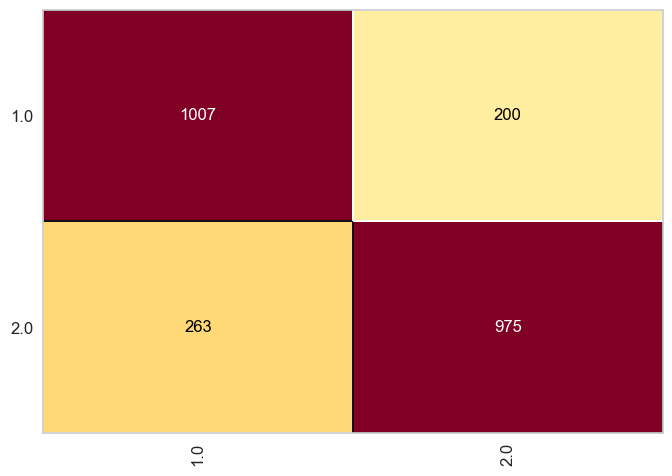

In [216]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [217]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81      1207
         2.0       0.83      0.79      0.81      1238

    accuracy                           0.81      2445
   macro avg       0.81      0.81      0.81      2445
weighted avg       0.81      0.81      0.81      2445



In [218]:
modelo.classes_

array([1., 2.])

IndexError: list index out of range

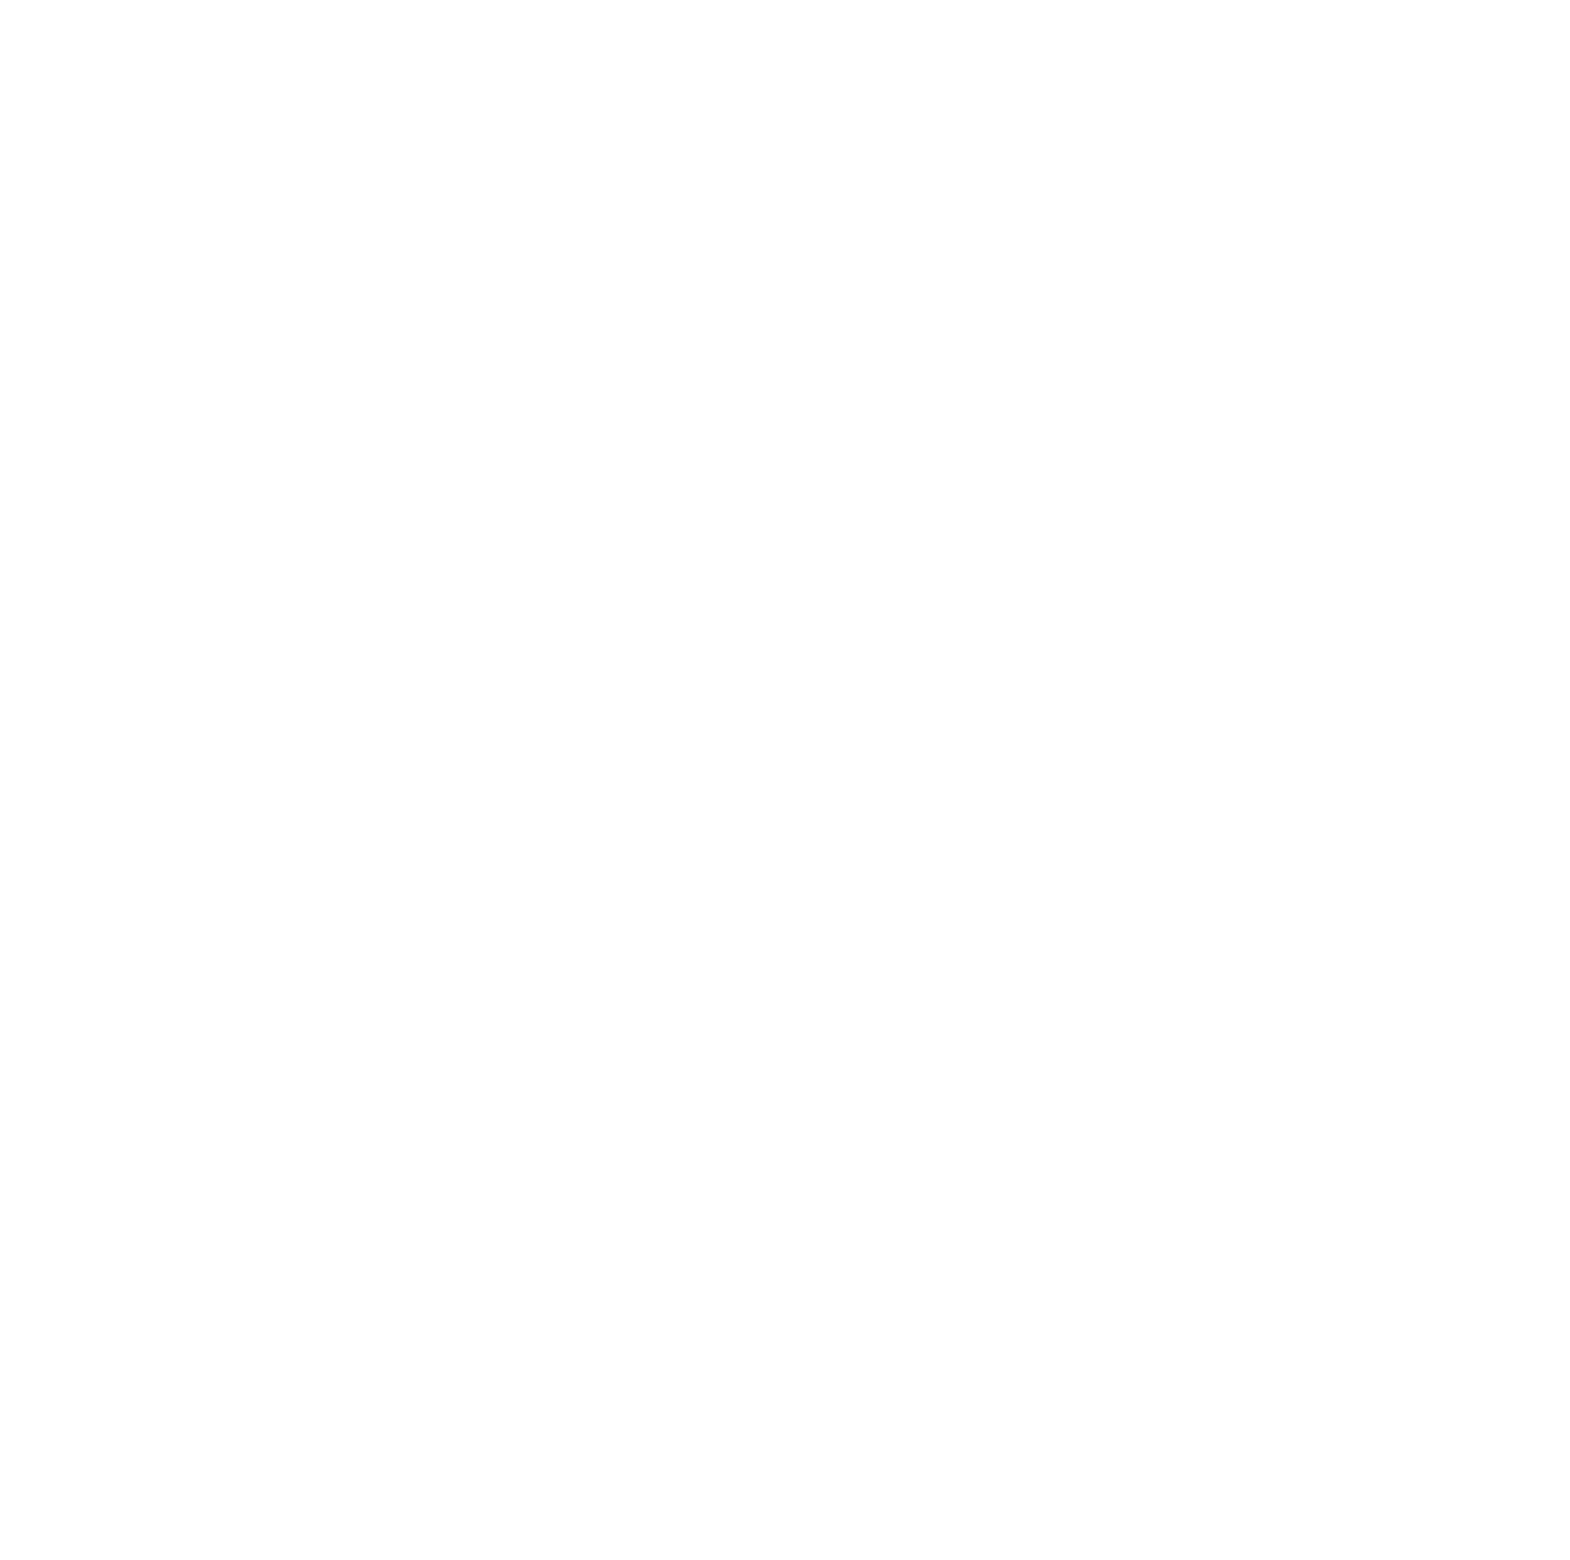

In [219]:
previsores = ['C006','C008','I00102','J01101','N001','N00101','N011','P00103','P00404','P00610','P00611','P018','P02002','P023','P02401','P027','P035','P050','P052','P053','P05401','P058','Q02901','Q03802','Q046015','Q046017','Q046018','VDF004']
class_names = [str(cls) for cls in modelo.classes_]
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#tree.plot_tree(random_search.best_estimator_, filled=True, feature_names=previsores, class_names=class_names)
tree.plot_tree(modelo, feature_names=previsores, class_names = class_names, filled=True)